In [5]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt

%matplotlib inline

# Function for creating the data

In [4]:
def create_data(n, xmin=-2, xmax=12, a=1.1, b=2.0):
    x = rnd.random(n) * (xmax-xmin) + xmin
    y = a* x + b + rnd.randn(n) * 0.5
    
    return x, y

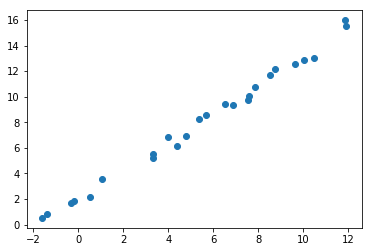

In [9]:
x, y = create_data(25)

plt.scatter (x, y)
plt.show()

# Compute the data matrix $X$

The functions `data_matrix_V1`, `data_matrix_V2`, `data_matrix_V3` are different data creating method. 

In [12]:
def data_matrix_V1(x):
    n = len(x)
    return np.vstack((x, np.ones(n))).T

def data_matrix_V2(x):
    return np.vstack((x, np.ones_like(x))).T

def data_matrix_V3(x):
    return np.vander(x, 2)

Three fections to solve least squares for linear regression

In [13]:
def lsq_solution_V1(X, y):
    w = np.dot(np.dot(la.inv(np.dot(X.T, X)), X.T), y)
    return w

def lsq_solution_V2(X, y):
    w = np.dot(la.pinv(X), y)
    return w

def lsq_solution_V3(X, y):
    w, residual, rank, svalues = la.lstsq(X, y)
    return w

/Users/Larry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


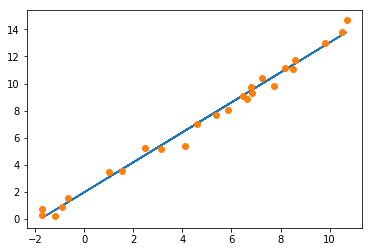

In [15]:
n = 25
x, y = create_data(n)
X = np.vander(x, 2)
w = la.lstsq(X, y)[0]

yhat = np.dot(X, w)
plt.plot(x, yhat, '-')
plt.plot(x, y, 'o')
plt.show()

In [17]:
np.vander?